# Feuille de travaux pratiques. Calcul numérique de valeurs et de vecteurs propres

In [3]:
# chargement des bibliothèques
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt



## Exercice 1 (méthode de la puissance)

La [méthode de la puissance](https://en.wikipedia.org/wiki/Power_iteration) est une méthode itérative très simple fournissant des approximations de la valeur propre de plus grand module d'une matrice (on parle de valeur propre dominante) et d'un vecteur propre associé.

Soit $n$ un entier naturel non nul et $A$ une matrice d'ordre $n$ que l'on suppose  diagonalisable. On note $\lambda_i$, $i=1,\dots,n$, les valeurs propres de $A$, comptées avec leurs multiplicités respectives et ordonnées de la manière suivante
$$
|\lambda_1|\leq|\lambda_2|\leq\dots\leq|\lambda_n|,
$$
et l'on désigne par $\{v_i\}_{i=1,\dots,n}$ une base de vecteurs propres associés. On suppose de plus que $\lambda_n$ a une multiplicité algébrique égale à un et qu'elle est la seule valeur propre de plus grand module.

Dans toute la suite, on note $\|\cdot\|_2$ la norme euclidienne sur $M_{n,1}(\mathbb{C})$.

La méthode de la puissance pour calculer $\lambda_n$ et un vecteur propre $v_n$ associé consiste en l'algorithme suivant.

* **Initialisation :**
choisir $q^{(0)}\in M_{n,1}(\mathbb{C})$ tel que $\|q^{(0)}\|_2=1$,
* **Itérations :** pour $k\in\mathbb{N}^*$, $z^{(k)}=Aq^{(k-1)}$, $\displaystyle q^{(k)}=\frac{z^{(k)}}{\|z^{(k)}\|_2}$, $\nu^{(k)}=(q^{(k-1)})^*Aq^{(k-1)}$.

En supposant que le vecteur $q^{(0)}$ n'est pas contenu dans le sous-espace engendré par les vecteurs propres associés aux valeurs propres autres que la valeur propre dominante $\lambda_n$, on peut montrer que la suite des vecteurs $(q^{(k)})_{k\in\mathbb{N}}$ et la suite des quotients de Rayleigh $(\nu^{(k)})_{k\in\mathbb{N}}$ convergent respectivement vers un vecteur colinéaire à $v_n$ et vers $\lambda_n$ lorsque $k$ tend vers l'infini, la convergence
étant d'autant plus rapide que le quotient $|\lambda_{n-1}/\lambda_n|$ est petit.

**1.** Proposer un critère d'arrêt pour les itérations de l'algorithme de la méthode de la puissance introduit plus haut.

On peut mettre fin aux itérations de l'algorithme de la méthode de la puissance lorsque la quantité $\lvert\nu^{(k+1)}−\nu^{(k)}\rvert$, $k\in\mathbb{N}^*$, définie à partir de la différence entre deux approximations successives de la valeur propre dominante de la matrice $A$, est inférieure à une tolérance choisie par l'utilisateur.

**2.** Écrire une fonction `[lambda,v,iter]=puissance(A,q0,tol,itermax)` mettant en &oelig;uvre l'algorithme de la méthode de la puissance ainsi obtenu, les paramètres d'entrée `tol` et `itermax` représentant respectivement la tolérance pour le critère d'arrêt et le nombre maximum d'itérations effectuées, les paramètres en sortie `lambda`, `v` et `iter` contenant respectivement l'approximation de la valeur propre dominante calculée, l'approximation d'un vecteur propre associé et le nombre d'itérations qui ont été nécessaires pour satisfaire le critère d'arrêt en cas de convergence.

In [4]:
def puissance(A,q0,tol,itermax):
# calcul de la valeur propre de plus grand module de la matrice A
# et d'un vecteur propre associé de norme égale à 1 par la méthode de la puissance
    m,n=A.shape
    if n!=m:
        raise ValueError('La matrice doit etre carrée.')
    iter=1
    z=np.dot(A,q0) 
    normz=np.array([np.linalg.norm(z)])
    oldlambda=np.dot(q0,z)
    q=z/normz[0]
    res=tol+1
    while (res>tol) and (iter<itermax):
        iter=iter+1 
        z=np.dot(A,q)
        normz=np.append(normz,np.linalg.norm(z))
        newlambda=np.dot(q,z)
        q=z/normz[-1]        
        res=abs(newlambda-oldlambda)
        oldlambda=newlambda
    if (res>tol):
        print('Nombre maximum d\'itérations atteint sans que le critère d\'arrêt soit satisfait.')
    return newlambda,q,iter,normz


**3.** On considère la matrice
$$
A=\begin{pmatrix}15&-2&2\\1&10&-3\\-2&1&0\end{pmatrix}.
$$
**(a)** Utiliser la fonction `puissance` pour approcher la valeur propre dominante de $A$, ainsi qu'un vecteur propre associé, en prenant le vecteur $q^{(0)}=\begin{pmatrix}1&1&1\end{pmatrix}^\top/\sqrt{3}$ comme initialisation et une tolérance égale à $10^{-8}$ pour le critère d'arrêt.

In [5]:
A=np.array([[15.,-2.,2.],[1.,10.,-3.],[-2.,1.,0.]])
q0=np.array([1.,1.,1.])/np.sqrt(3.)
tol=1e-8
itermax=1000
valp,vectp,iter,normz=puissance(A,q0,tol,itermax)
print('Valeur propre approchée :',valp)
print('Vecteur propre associé :',vectp)

Valeur propre approchée : 14.102555738098438
Vecteur propre associé : [ 0.94359219  0.31169404 -0.11171665]


**(b)** Valider le résultat obtenu en utilisant la commande `eig`.

In [7]:
valA,vectA=np.linalg.eig(A)
print('Valeur propre dominante calculée avec eig :',valA[np.argmax(abs(valA))])
print('Valeur absolue de la différence avec la valeur calculée par eig :',abs(valp-valA[np.argmax(abs(valA))]))

Valeur propre dominante calculée avec eig : 14.102555760088627
Valeur absolue de la différence avec la valeur calculée par eig : 2.1990189225107315e-08


**4.** On souhaite à présent évaluer l'influence de la condition initiale sur la convergence de la méthode. On considère pour cela la matrice réelle symétrique
$$
B=\begin{pmatrix}
0,5172&0,5473&-1,224&0,8012\\
0,5473&1,388&1,353&-1,112\\
-1,224&1,353&0,03642&2,893\\
0,8012&-1,112&2,893&0,05827
\end{pmatrix}.
$$
**(a)** Pour chacune des trois initialisations qui suivent, tracer sur une même figure les termes de la suite $\|z^{(k)}\|_2$ en fonction de l'entier $k$ : $q^{(0)}=\begin{pmatrix}1&0&0&0\end{pmatrix}^\top$, $\begin{pmatrix}1&1&1&1\end{pmatrix}^\top/\sqrt{4}$ et $\begin{pmatrix}1&1&0&0\end{pmatrix}^\top/\sqrt{2}$.

Valeur propre approchée avec l'initialisation 1 : -3.9956706987041213
Valeur propre approchée avec l'initialisation 2 : -3.9956707032870553
Valeur propre approchée avec l'initialisation 3 : -3.995670702884494


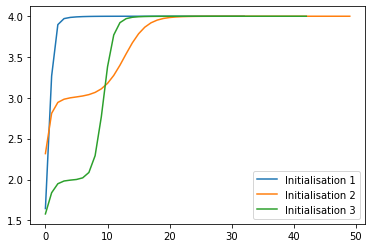

In [8]:
B=np.array([[ 0.5172, 0.5473,-1.224,   0.8012],
         [ 0.5473, 1.388,  1.353,  -1.112],
         [-1.224,  1.353,  0.03642, 2.893],
         [ 0.8012,-1.112,  2.893,   0.05827]])

q0=np.array([1.,0.,0.,0.])
lambda1,v,iter,normz1=puissance(B,q0,tol,itermax)
print('Valeur propre approchée avec l\'initialisation 1 :',lambda1)

q0=np.array([1.,1.,1.,1.])/np.sqrt(4.)
lambda2,v,iter,normz2=puissance(B,q0,tol,itermax)
print('Valeur propre approchée avec l\'initialisation 2 :',lambda2)

q0=np.array([1.,1.,0.,0.])/np.sqrt(2.)
lambda3,v,iter,normz3=puissance(B,q0,tol,itermax)
print('Valeur propre approchée avec l\'initialisation 3 :',lambda3)

fig=plt.figure()
plt.plot(np.array(normz1),label='Initialisation 1')
plt.plot(np.array(normz2),label='Initialisation 2')
plt.plot(np.array(normz3),label='Initialisation 3')
plt.legend()

**(b)** Utiliser la commande `eig` pour obtenir les valeurs propres de $B$. Commenter alors les trois courbes obtenues à la question précédente en tentant de donner des explications.

In [9]:
valB,vecB=np.linalg.eig(B)
print('Valeurs propres de la matrice B calculée avec eig :',valB)

Valeurs propres de la matrice B calculée avec eig : [-3.99567071  1.00052008  3.00229491  1.99274573]


Ce calcul permet d'interpréter les différences entre les trois courbes tracées à la question précédente. Avec la première initialisation, l'approximation calculée par la méthode de la puissance converge directement vers la valeur propre dominante de $B$. En revanche, avec la deuxième ou la troisième initialisation, on semble tout d'abord converger vers une autre valeur propre (celle proche de $3$ pour la deuxième initialisation, celle proche de $2$ pour la troisième) pour finalement atteindre la valeur propre dominante.

Une étude attentive du vecteur initial choisi dans chacun de ces cas montre que celui-ci possède une composante le long du sous-espace propre associé à la valeur propre vers laquelle la convergence est initialement observée qui est bien plus importante que sa composante le long du sous-espace propre associé à la valeur propre dominante (la rapport est de plus de $40$ pour la deuxième initialisation et de plus de $835$ pour la troisième, contre un peu moins de $3$ pour la première). Néanmoins, après quelques itérations, la méthode a rendu cette dernière composante suffisamment grande pour que la convergence vers la valeur propre dominante ait lieu, induisant le changement de régime observé sur la courbe de convergence.

## Exercice bonus (méthode de la puissance inverse)
La méthode de la puissance inverse permet d'obtenir une approximation de la valeur propre d'une matrice $A$ d'ordre $n$ la plus proche d'un nombre complexe $\mu$ donné n'appartenant pas au spectre de $A$. Ceci se fait en appliquant la méthode de la puissance à la matrice ${M_\mu}^{-1}=(A-\mu I_n)^{-1}$. Bien que plus coûteuse que la méthode de la puissance (elle nécessite en effet de résoudre un système linéaire à chaque itération de l'algorithme), la méthode de la puissance inverse a l'avantage de pouvoir converger vers n'importe quelle valeur propre de $A$ et se prête donc bien au raffinement d'une approximation d'une valeur propre, obtenue, par exemple, par une technique de localisation.

Dans la pratique, on calcule une fois pour toute la factorisation LU de la matrice $M_\mu$, ce qui permet de ne plus avoir ensuite qu'à résoudre deux systèmes triangulaires à chaque itération de la méthode.

**1.** Sur le modèle de la fonction `puissance` de l'exercice précédent, écrire une fonction `[lambda,v,iter]=puissanceinv(A,q0,mu,tol,itermax)` mettant en oeuvre la méthode de la puissance inverse, le paramètre d'entrée `mu` étant l'approximation initiale de la valeur propre que l'on souhaite approcher. On utilisera les fonctions `linalg.lu` et `linalg.solve_triangular` de SciPy pour respectivement calculer la factorisation LU de la matrice $M_\mu$ et résoudre les systèmes triangulaires (inférieur et supérieur) associés à cette factorisation.

In [10]:
from scipy import linalg

def puissanceinv(A,q0,mu,tol,itermax):
# calcul de la valeur propre de la matrice A la plus proche du nombre mu
# et d'un vecteur propre associé de norme égale à 1 par la méthode de la puissance inverse
    m,n=A.shape
    if n!=m:
        raise ValueError('La matrice doit etre carrée.')    
    M=A-mu*np.eye(n) 
    P,L,U=linalg.lu(M)
    iter=1
    x=np.dot(P,q0)
    y=linalg.solve_triangular(L,x,lower=True)
    z=linalg.solve_triangular(U,y)
    normz=np.array([np.linalg.norm(z)])
    normz=np.array([np.linalg.norm(z)])
    oldlambda=mu+1./np.dot(q0,z)
    q=z/normz[0]
    res=tol+1
    while (res>tol) and (iter<itermax):
        iter+=1 
        x=np.dot(P,q)
        y=linalg.solve_triangular(L,x,lower=True)
        z=linalg.solve_triangular(U,y)
        normz=np.append(normz,np.linalg.norm(z))
        newlambda=mu+1./np.dot(q,z)
        q=z/normz[-1]        
        res=abs(newlambda-oldlambda)
        oldlambda=newlambda
    if (res>tol):
        print('Nombre maximum d\'itérations atteint sans que le critère d\'arrêt soit satisfait.')
    return newlambda,q,iter,normz

**2.** Utiliser la fonction `puissanceinv` pour calculer la valeur propre de plus petit module de la matrice $A$ de l'exercice précédent, en prenant $q^{(0)}=\begin{pmatrix}1&1&1\end{pmatrix}^T/\sqrt{3}$ comme initialisation et une tolérance égale à $10^{-8}$ pour le critère d'arrêt.

In [11]:
q0=np.array([1.,1.,1.])/np.sqrt(3.)
mu=0.
valp,vectp,iter,normz=puissanceinv(A,q0,mu,tol,itermax)
print('Valeur propre de plus petit module de A approchée :',valp)
print('Valeur propre de plus petit module de A calculée par eig :',valA[np.argmin(abs(valA))])

Valeur propre de plus petit module de A approchée : 0.5120848260210503
Valeur propre de plus petit module de A calculée par eig : 0.5120848255718702
